In [26]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [27]:
df = pd.read_csv('SALES_TOKO_FORECAST.csv')

In [28]:
# Rename columns
df = df.rename(columns={'HR_DATE': 'date', 'SUM(HR_NET_VALUE)': 'sales'})

In [29]:
df.head()

,date,HR_KD_STORE,sales
0,2022-12-23 00:00:00.000,TH28,9974946.04
1,2022-12-24 00:00:00.000,TH28,3831644.17
2,2022-12-25 00:00:00.000,TH28,2471650.44
3,2022-12-26 00:00:00.000,TH28,2792918.03
4,2022-12-27 00:00:00.000,TH28,4098732.60


In [30]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

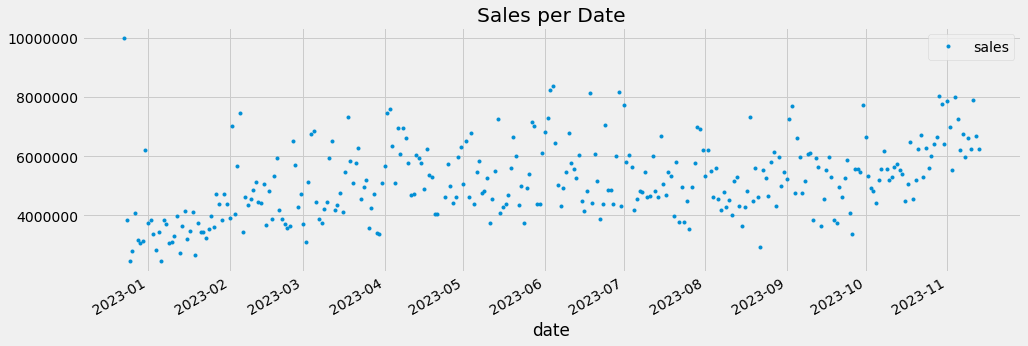

In [31]:
df.plot(style = '.',y='sales',figsize=(15,5),color=color_pal[0],title='Sales per Date').get_yaxis().get_major_formatter().set_scientific(False)

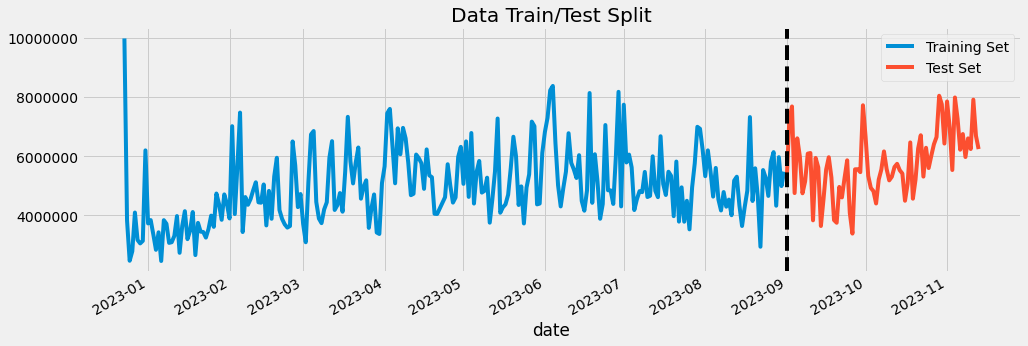

In [32]:
train = df.loc[df.index < '2023-09-01']
test = df.loc[df.index >= '2023-09-01']
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set',title='Data Train/Test Split').get_yaxis().get_major_formatter().set_scientific(False)
test.plot(ax=ax,label='Test Set').get_yaxis().get_major_formatter().set_scientific(False)
ax.axvline('2023-09-01',color='black',ls='--')
ax.legend(['Training Set','Test Set'])


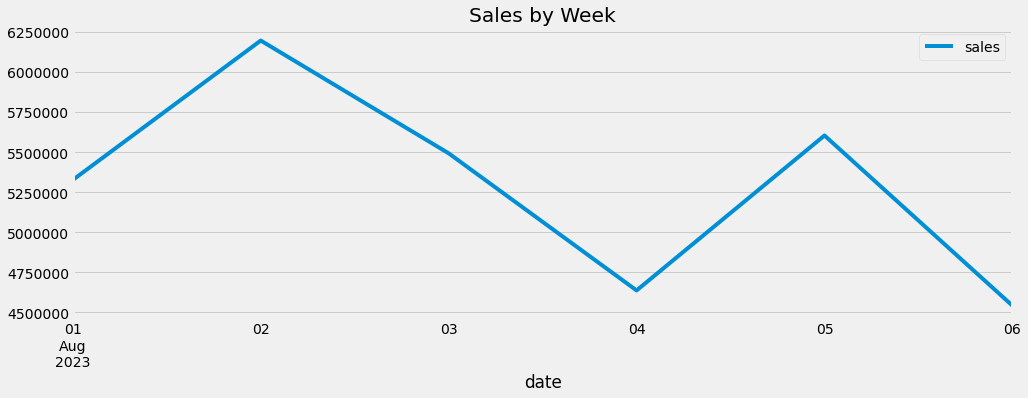

In [33]:
df.loc[(df.index > '2023-07-31') & (df.index <= '2023-08-06')].plot(figsize=(15,5),title='Sales by Week').get_yaxis().get_major_formatter().set_scientific(False)

In [34]:
def create_features(df):
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [35]:
df = create_features(df)

In [36]:
df.head()

,HR_KD_STORE,sales,dayofweek,hour,quarter,month,year,dayofyear
date,,,,,,,,
2022-12-23,TH28,9974946.04,4,0,4,12,2022,357
2022-12-24,TH28,3831644.17,5,0,4,12,2022,358
2022-12-25,TH28,2471650.44,6,0,4,12,2022,359
2022-12-26,TH28,2792918.03,0,0,4,12,2022,360
2022-12-27,TH28,4098732.60,1,0,4,12,2022,361


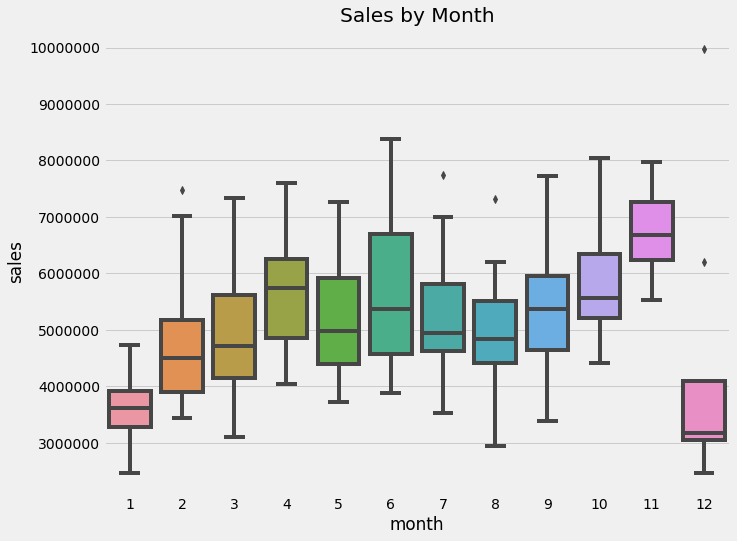

In [37]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=df,x='month',y='sales').get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Sales by Month')
plt.show()

In [38]:
train = create_features(train)
test = create_features(test)

C:\Users\ardit\AppData\Local\Temp\ipykernel_17988\4092546636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\ardit\AppData\Local\Temp\ipykernel_17988\4092546636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\ardit\AppData\Local\Temp\ipykernel_17988\4092546636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [39]:
df.columns

Index(['HR_KD_STORE', 'sales', 'dayofweek', 'hour', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [40]:
FEATURES = ['dayofweek','quarter', 'month', 'year','dayofyear']
TARGET = 'sales'

In [41]:
x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [42]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_round =50,learning_rate=0.01)
reg.fit(x_train,y_train,
        eval_set =[(x_train,y_train),(x_test,y_test)], 
        verbose=100) 


c:\Users\ardit\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:05:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1228943.32427	validation_1-rmse:1332798.92358


[100]	validation_0-rmse:848647.70500	validation_1-rmse:1605815.53307
[200]	validation_0-rmse:681935.74932	validation_1-rmse:1641161.46493
[300]	validation_0-rmse:572379.68370	validation_1-rmse:1719922.44190
[400]	validation_0-rmse:499085.66255	validation_1-rmse:1794017.79156
[500]	validation_0-rmse:447422.43722	validation_1-rmse:1832837.57044
[600]	validation_0-rmse:397505.37942	validation_1-rmse:1862233.41935
[700]	validation_0-rmse:350111.49730	validation_1-rmse:1871547.04844
[800]	validation_0-rmse:319458.08184	validation_1-rmse:1916022.82207
[900]	validation_0-rmse:292103.41619	validation_1-rmse:1936414.63444
[999]	validation_0-rmse:269278.20049	validation_1-rmse:1961969.59339


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

<AxesSubplot:title={'center':'Feature Importance'}>

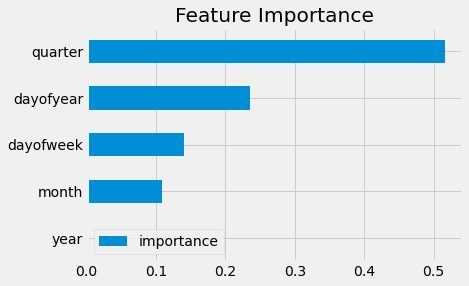

In [43]:
fi = pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])
fi.sort_values('importance').plot(kind='barh',title='Feature Importance')

In [44]:
test['prediction'] = reg.predict(x_test)
df = df.merge(test['prediction'],how='left',left_index=True,right_index=True)

C:\Users\ardit\AppData\Local\Temp\ipykernel_17988\3434888387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(x_test)


Text(0.5, 1.0, 'Raw data and Prediction')

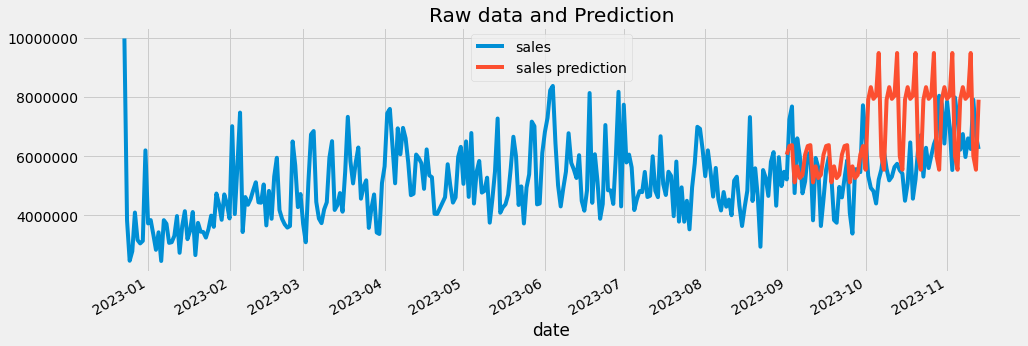

In [45]:
ax = df['sales'].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='-').get_yaxis().get_major_formatter().set_scientific(False)
plt.legend(['sales','sales prediction'])
ax.set_title('Raw data and Prediction')

Text(0.5, 1.0, 'Week of data')

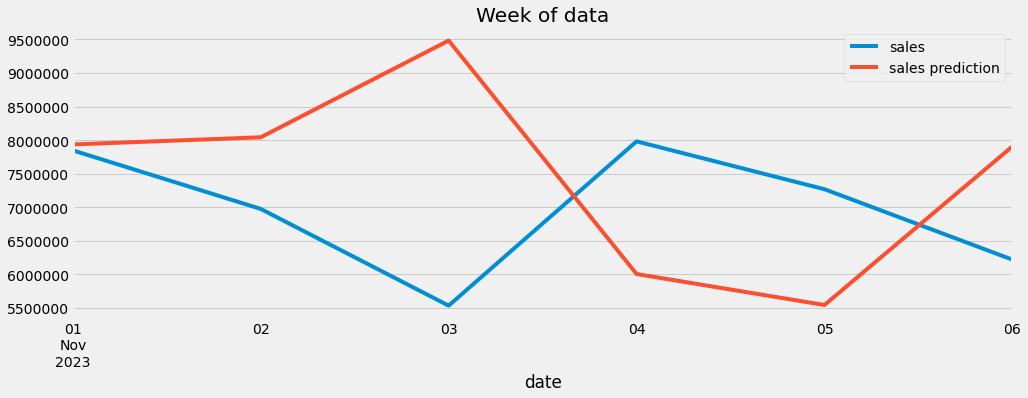

In [46]:
ax = df.loc[(df.index > '2023-10-31') & (df.index <= '2023-11-06')]['sales'].plot(figsize=(15,5))
df.loc[(df.index > '2023-10-31') & (df.index <= '2023-11-06')]['prediction'].plot(ax=ax,style='-').get_yaxis().get_major_formatter().set_scientific(False)
plt.legend(['sales','sales prediction'])
ax.set_title('Week of data')

In [47]:
score = np.sqrt(mean_squared_error(test['sales'],test['prediction']))
print(f"score : {score:0.2f}")

score : 1961969.58


In [48]:
test['error']=np.abs(test[TARGET] - test['prediction'])
test['error'].sort_values(ascending=False)

C:\Users\ardit\AppData\Local\Temp\ipykernel_17988\3816389017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error']=np.abs(test[TARGET] - test['prediction'])


date
2023-10-20    4274013.58
2023-10-06    4272403.81
2023-11-03    3948964.08
2023-10-13    3739688.25
2023-10-05    3636749.38
                 ...    
2023-09-28     190710.00
2023-09-18     166165.29
2023-10-30     153155.07
2023-10-15     129203.45
2023-11-01      88360.68
Name: error, Length: 74, dtype: float64